In [7]:
import pandas as pd
from astropy.table import QTable
from matplotlib import pyplot as plt
from astropy.io import ascii
import astropy.units as u
import numpy as np
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline

In [8]:
data = ascii.read("C:/Users/Leona/Desktop/Física/Masters/Python Exercicios/Data Visualization/NGC5371_rotmod.dat")

In [222]:
Raio = data['col1'] * u.kpc
Vstar = data['col2']* u.m / u.s
Err = data['col3']* u.m / u.s
Vgas = data['col4']* u.m / u.s
Tabela = QTable([Raio,Vstar, Err, Vgas], names=("Raio", "Vstar", "Erro", "Vgas"))
#print(Tabela)

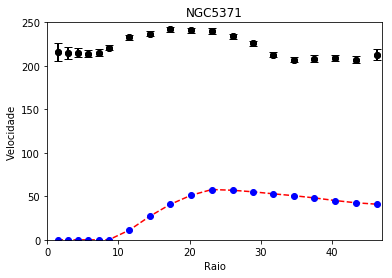

In [242]:
plt.plot( data['col1'], data['col2'], 'ko')
plt.title("NGC5371")
plt.xlabel("Raio")
plt.ylabel("Velocidade")
plt.axis([0, 47, 0, 250])
plt.errorbar( data['col1'], data['col2'],yerr=data['col3'], fmt='ko', capsize=4, elinewidth=2)
plt.plot( data['col1'], Intgas(Rkpc),'r--', data['col1'], data['col4'], 'bo')
#plt.show()

In [300]:
#Constantes
from astropy import constants as const
G = const.G.value
Rkpc = Raio.to(u.m)

array([ 1.34434893e-18, -1.08420217e-17,  3.81639165e-17, -1.24900090e-16,
        4.99600361e-16, -7.77156117e-16,  1.12400000e+01,  2.74500000e+01,
        4.07400000e+01,  5.12200000e+01,  5.78100000e+01,  5.69500000e+01,
        5.52200000e+01,  5.28400000e+01,  5.06800000e+01,  4.81900000e+01,
        4.51700000e+01,  4.25700000e+01,  4.09500000e+01])

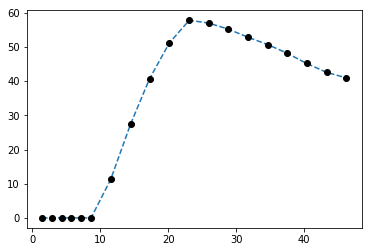

In [301]:
#Interpolação do Gas
Intgas= InterpolatedUnivariateSpline(Rkpc, data['col4'])
plt.plot(Raio, Intgas(Rkpc), '--',Raio, data['col4'], 'ko')
Intgas(Rkpc)

In [302]:
from sympy import *
from sympy import besseli, besselk
from sympy import var
init_printing()
from scipy.special import k0, k1, i0, i1
r, M = var('r, M')
Rd = 2
def  Vs(r, M):
    return G*M*((r**2)//(2*(Rd**3)))*(i0(r//(2*Rd))*k0(r//(2*Rd)) - i1(r//(2*Rd))*k1(r//(2*Rd)))


In [311]:
from sympy import pi, log, tan, atan
r, p, RO = var('r, p, RO')
def Vme(r, p, RO):
    return 6.4*G*((p*(RO**3))/r)* ((log(1+(r/RO))) - atan(r//RO) + log(1+((r/RO)**2)/2))

In [312]:
def Vt(r, M, p, RO):
    return (Intgas(Rkpc)**2 + Vs(r, M) + Vme(r, p, RO))**0.5


In [313]:
Vme(Rkpc, 10, 2)

UnitsError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [272]:
QQQ

array([4.47423249e+19, 8.88675143e+19, 1.33609839e+20, 1.78352164e+20,
       2.22785921e+20, 2.67219679e+20, 3.56395761e+20, 4.46806114e+20,
       5.33205086e+20, 6.23306871e+20, 7.13408657e+20, 8.03510442e+20,
       8.89909414e+20, 9.80011200e+20, 1.07011299e+21, 1.15651196e+21,
       1.24661374e+21, 1.33671553e+21, 1.42681731e+21])

In [260]:
r